In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import urllib.request



Dataset downloaded!

Loading the dataset...


In [ ]:
# Download the dataset
print("Downloading Energy Efficiency dataset...")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
dataset_path = "Energy_Efficiency.xlsx"
urllib.request.urlretrieve(url, dataset_path)
print("Dataset downloaded!")

# Load the dataset
print("\nLoading the dataset...")
df = pd.read_excel(dataset_path)

In [6]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [8]:
df.columns = [
    "Relative_Compactness",
    "Surface_Area",
    "Wall_Area",
    "Roof_Area",
    "Overall_Height",
    "Orientation",
    "Glazing_Area",
    "Glazing_Area_Distribution",
    "Heating_Load",
    "Cooling_Load"
]
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
# Basic statistics
print("\nDataset statistics:")
df.describe()


Dataset statistics:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


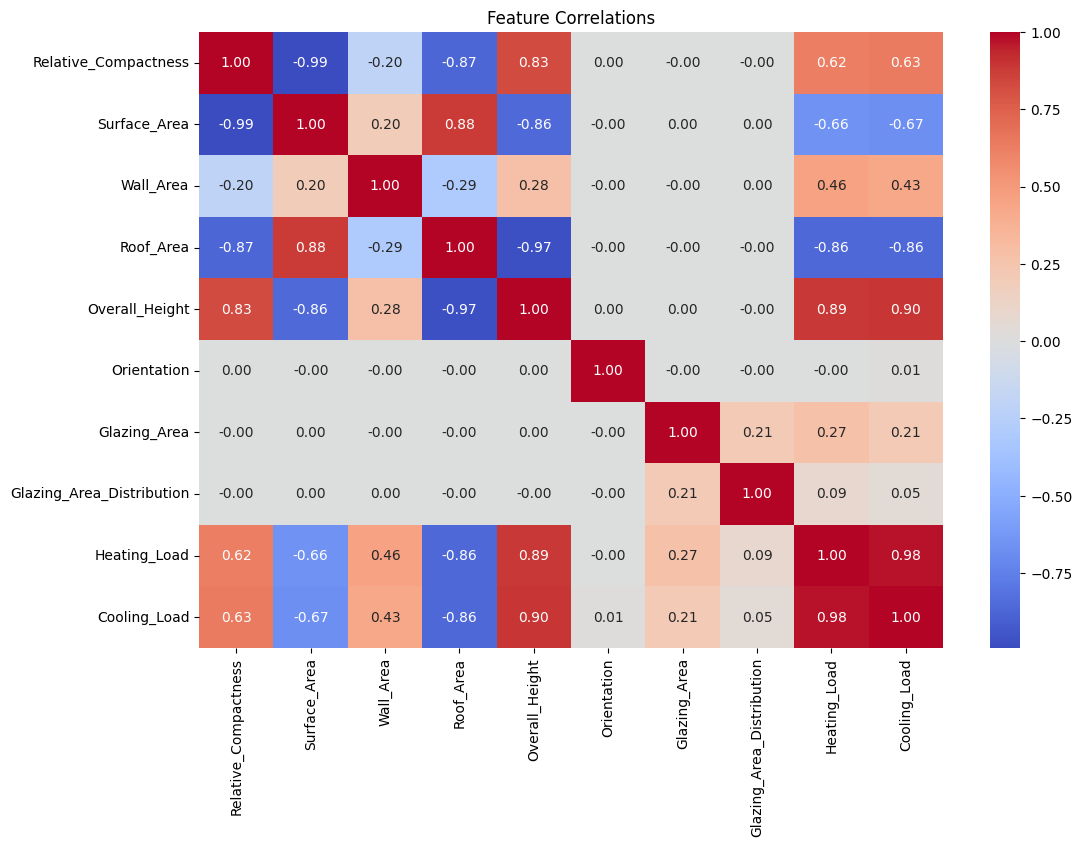

In [10]:
# Visualize feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

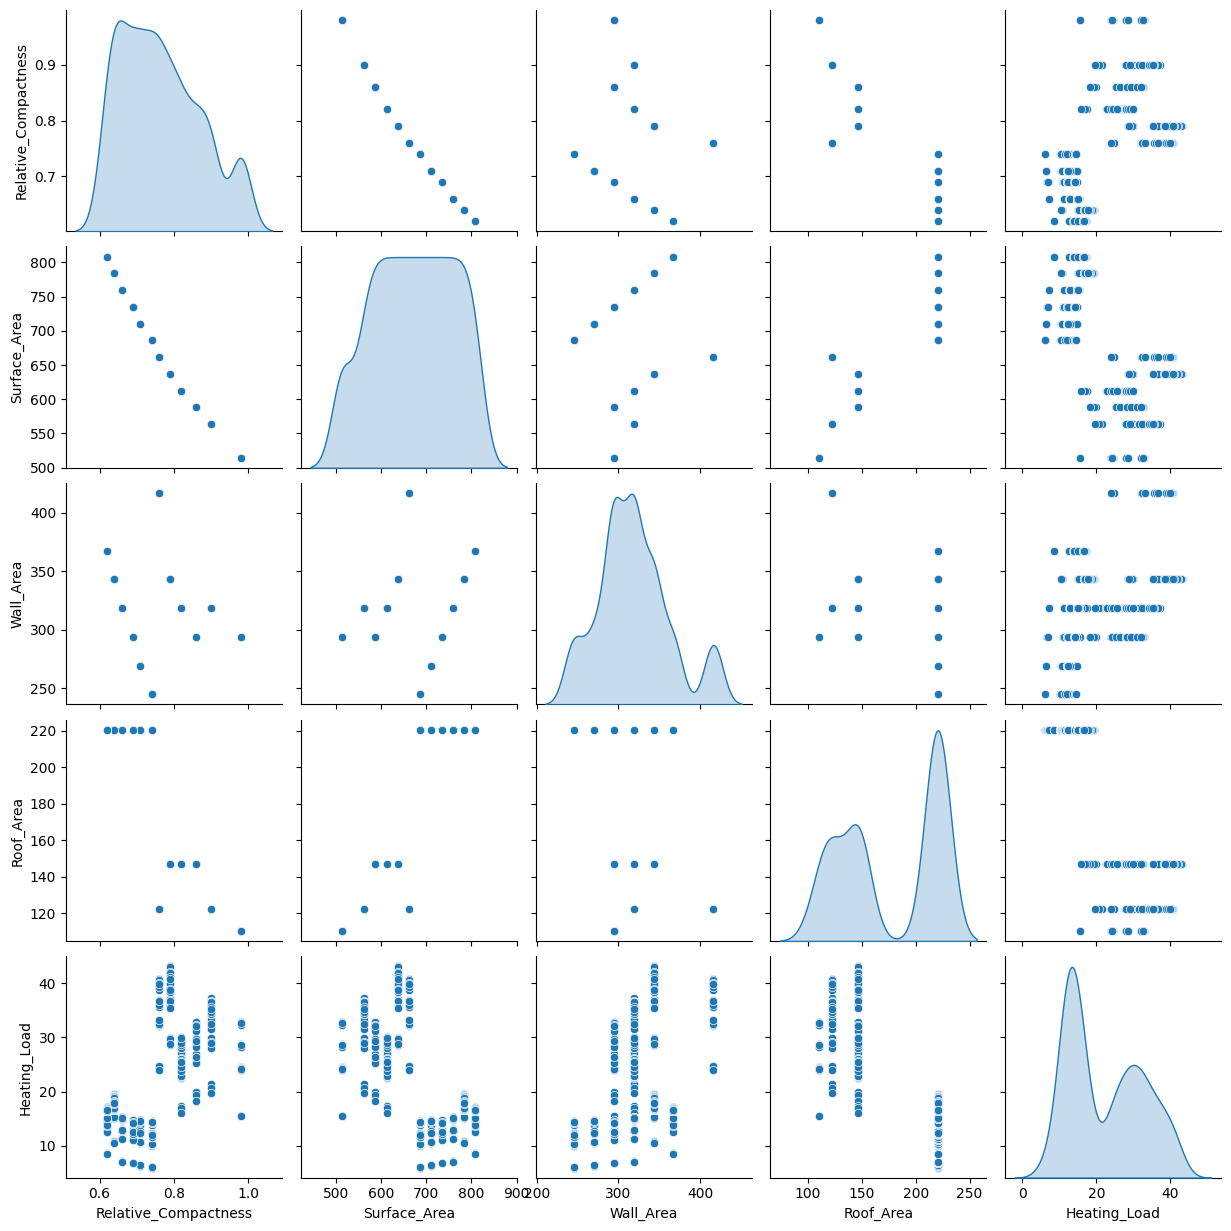

In [11]:
# Scatterplot of key features vs. Heating Load
sns.pairplot(df, vars=["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area", "Heating_Load"], diag_kind="kde")
plt.show()


In [12]:
# Preprocess the data
print("\nPreprocessing the dataset...")
features = [
    "Relative_Compactness", "Surface_Area", "Wall_Area",
    "Roof_Area", "Overall_Height", "Orientation",
    "Glazing_Area", "Glazing_Area_Distribution"
]
target = "Heating_Load"


Preprocessing the dataset...


In [13]:
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")


Data split into training and testing sets.


In [14]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features standardized.")

Features standardized.


In [18]:
# Step 3: Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [19]:
# Step 4: Evaluate the Model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 0.25
R2 Score: 1.00


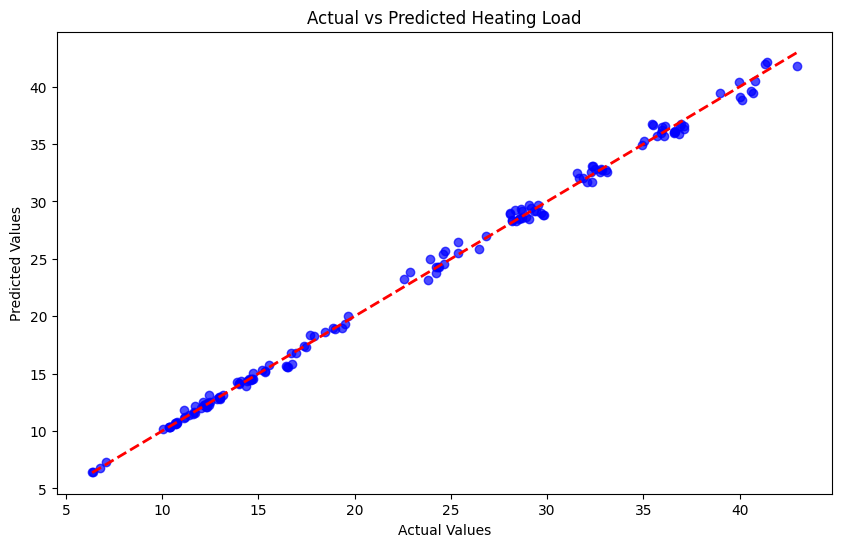

In [20]:
# Step 5: Visualize Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Heating Load')
plt.show()

In [21]:
# Step 6: Analyze Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
                     Feature  Importance
0       Relative_Compactness    0.386447
1               Surface_Area    0.188587
4             Overall_Height    0.151004
3                  Roof_Area    0.135531
6               Glazing_Area    0.079107
2                  Wall_Area    0.046204
7  Glazing_Area_Distribution    0.012426
5                Orientation    0.000694


In [22]:
# Step 7: Deep Analysis - Hyperparameter Tuning Impact
depths = [5, 10, 15, 20]
n_estimators = [50, 100, 150]
results = []

for depth in depths:
    for n_est in n_estimators:
        model = RandomForestRegressor(n_estimators=n_est, max_depth=depth, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({'Depth': depth, 'Estimators': n_est, 'MSE': mse, 'R2': r2})

results_df = pd.DataFrame(results)

<ipython-input-23-31741ae552b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


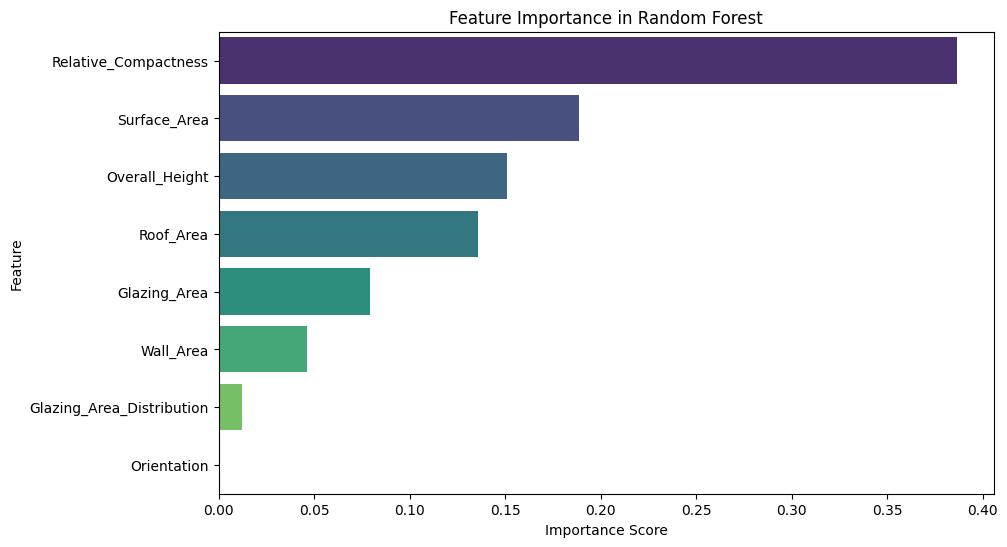

In [23]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

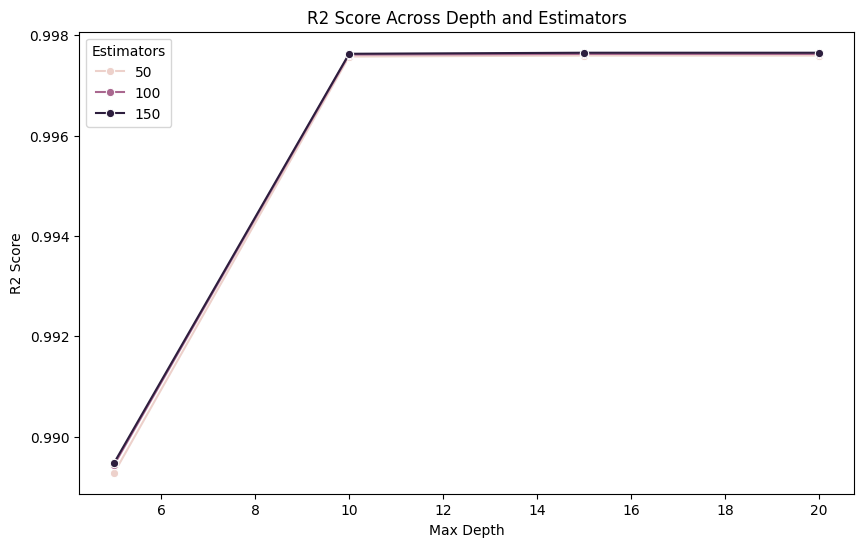

In [24]:

# Visualize Hyperparameter Tuning Results
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Depth', y='R2', hue='Estimators', marker='o')
plt.title('R2 Score Across Depth and Estimators')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.legend(title='Estimators')
plt.show()